<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Deep_learning_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

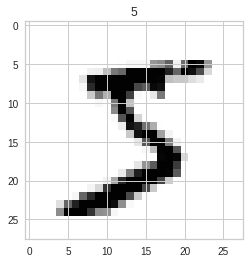

In [11]:
# divide a base
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[0])
plt.title(y_treinamento[0])
plt.show()

In [12]:
# reprocessamento

# muda o formato dos dados, que estao em 28x28, e devem ficar "planos"
# é usado o np.prod, pq ele faz a multiplicação dos parametros passados, como é passado a partir do index 1 do shape do dataset, ele faz 28 * 28
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
print(X_treinamento)
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
print(X_teste)

# converte tudo para float, para fazer uma normalização dos dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

# faz uma redução dos dados, para facilitar o processamento
# dividindo por 255, que seria o valor maximo, entao fica com valores entre 0 e 1
X_treinamento /= 255
X_teste /= 255

#criado a variavel dummy contendo as colunas pertinentes a cada digito (representando um  neuronio de saida de cada)
# normalmente usada em problemas de classificacao de mais de 2 classes
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# monta o modelo
modelo = Sequential()
# relu = retornao mesmo valor se positivo, ou zero se negativo, tendo bons resultados em processamento de imagens, input_dim = camada de entrada
modelo.add(Dense(units=64, activation = 'relu', input_dim = 784))
# camada de dropout, ou seja, zera alguns neuronios, para evitar o overfiting, com 0.2 zera 20%
modelo.add(Dropout(0.2))
# relu = retornao mesmo valor se positivo, ou zero se negativo, tendo bons resultados em processamento de imagens
modelo.add(Dense(units=64, activation = 'relu'))
# camada de dropout, ou seja, zera alguns neuronios, para evitar o overfiting, com 0.2 zera 20%
modelo.add(Dropout(0.2))
# camada de saida - softmax traz a probabilidade de ser de cada classe
modelo.add(Dense(units = 10, activation = 'softmax'))

modelo.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# parametriza o modelo
# categorical_crossentropy indicado para varias classes
modelo.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20, validation_data=(X_teste, y_teste))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 4s 75us/step - loss: 0.4090 - acc: 0.8769 - val_loss: 0.1658 - val_acc: 0.9489
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2138 - acc: 0.9355 - val_loss: 0.1275 - val_acc: 0.9608
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1732 - acc: 0.9478 - val_loss: 0.1064 - val_acc: 0.9665
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1526 - acc: 0.9528 - val_loss: 0.0967 - val_acc: 0.9708
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1392 - acc: 0.9584 - val_loss: 0.0969 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1272 - acc: 0.9613 - val_loss: 0.0919 - val_acc: 0.9717
Epoch 7/20
60000/60000 [

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


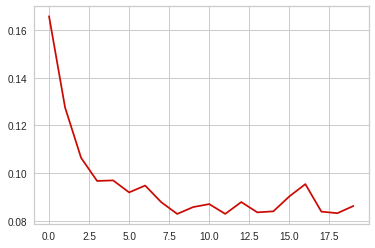

In [21]:
print(historico.history.keys())
plt.plot(historico.history['val_loss'], c='r')
plt.show()

In [23]:
# previsoes
previsoes = modelo.predict(X_teste)

# converte o resultado em 1 classe
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]

confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
print(confusao)

[[ 967    1    1    1    0    1    6    1    2    0]
 [   0 1121    2    2    0    0    4    0    4    2]
 [   3    0 1006    7    3    0    2    5    6    0]
 [   0    0    2  993    0    5    0    5    3    2]
 [   0    0    2    0  959    0    9    2    1    9]
 [   2    0    0    8    1  867    8    1    3    2]
 [   4    3    0    1    1    4  942    0    3    0]
 [   1    9    9    0    4    0    0  995    0   10]
 [   5    3    2    7    4    4    2    4  940    3]
 [   1    3    0    6   12    4    1    4    3  975]]


In [24]:
# prevendo um digito especifico
novo = X_treinamento[20]
# converte do formato 28x28 para apenas 784
novo = np.expand_dims(novo, axis = 0)

pred = modelo.predict(novo)
print(pred)

[[1.2296895e-12 3.4224631e-10 1.8570674e-07 7.5032052e-09 9.9999976e-01
  2.6214033e-09 1.8840447e-11 1.7359696e-09 1.0627522e-10 3.9316532e-08]]
